# Classification BankNote Authentication Project

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from IPython.display import display, HTML 

## Load the Dataset

In [2]:
# Load the dataset 
df = pd.read_csv('/kaggle/input/banknote-authentication-uci/BankNoteAuthentication.csv')

# Display the first 5 rows o
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Explore the Data

In [3]:
# Check for missing values
print("🔍 Missing Values:")
print(df.isnull().sum())

# Display dataset shape
print("\n📐 Dataset Shape:", df.shape)

# Display summary statistics
print("\n📈 Summary Statistics:")
display(df.describe())


🔍 Missing Values:
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

📐 Dataset Shape: (1372, 5)

📈 Summary Statistics:


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Display Class Distribution

In [4]:
#Display value counts for the 'class' column and identify the most frequent class
print("\n📊 Class Counts:")
print(df['class'].value_counts())

print("\nMost Frequent Class:", df['class'].mode()[0])


📊 Class Counts:
class
0    762
1    610
Name: count, dtype: int64

Most Frequent Class: 0


## Feature Distribution by Class

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


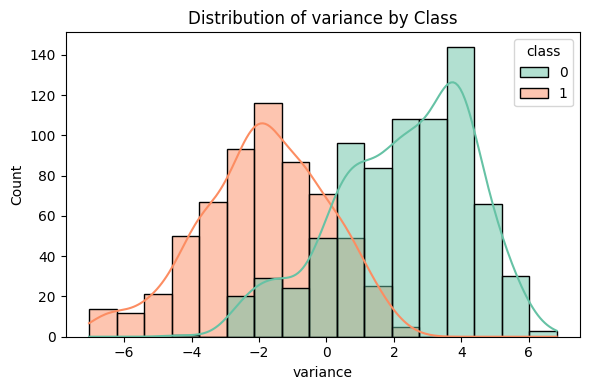

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


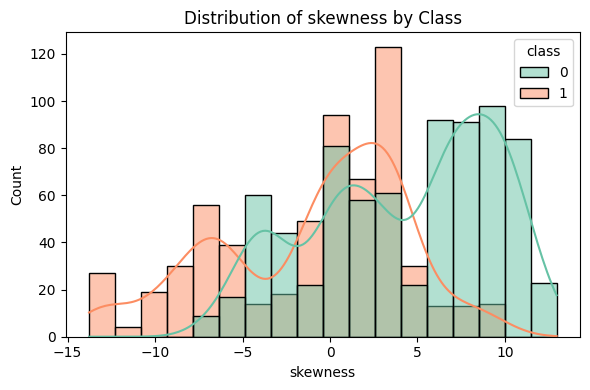

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


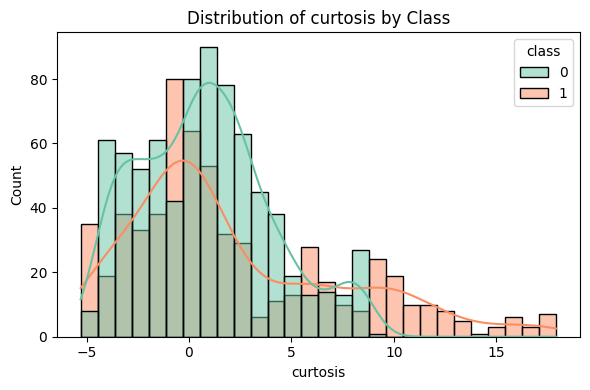

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


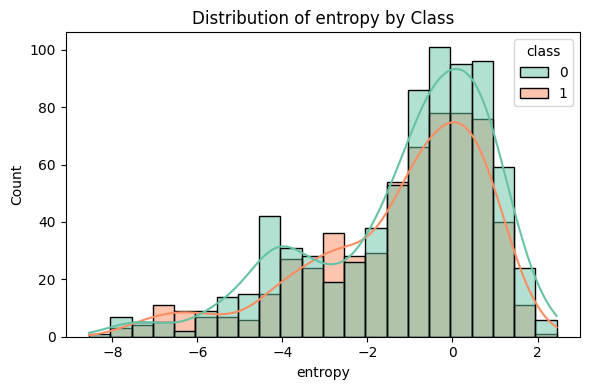

In [5]:
#Plot distribution of each feature colored by class (0 = Genuine , 1 = Fake)
features = ['variance', 'skewness', 'curtosis', 'entropy']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='class', kde=True, palette='Set2')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show() 

## Split Features and Target

In [6]:
# Split features (X) and target (y)
x = df.drop('class', axis=1)
y = df['class']

## Split into Training and Testing Sets

In [7]:
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


## Feature Scaling (Standardization)

In [8]:
# Scale features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-Nearest Neighbors (KNN) Model Training and Evaluation

In [9]:
# Train multiple KNN models with different k values to compare performance

# KNN with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)

# KNN with k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)

# KNN with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, y_train)

# KNN with k=10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train_scaled, y_train)

# KNN with k=15
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train_scaled, y_train)

# KNN with k=30
knn30 = KNeighborsClassifier(n_neighbors=30)
knn30.fit(X_train_scaled, y_train)

# KNN with k=50
knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(X_train_scaled, y_train)

# KNN with k=100
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train_scaled, y_train)

# Make predictions for each model
y_pred_knn3 = knn3.predict(X_test_scaled)
y_pred_knn5 = knn5.predict(X_test_scaled)
y_pred_knn7 = knn7.predict(X_test_scaled)
y_pred_knn10 = knn10.predict(X_test_scaled)
y_pred_knn15 = knn15.predict(X_test_scaled)
y_pred_knn30 = knn30.predict(X_test_scaled)
y_pred_knn50 = knn50.predict(X_test_scaled)
y_pred_knn100 = knn100.predict(X_test_scaled)

# Calculate accuracy for each model
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3) * 100
accuracy_knn5 = accuracy_score(y_test, y_pred_knn5) * 100
accuracy_knn7 = accuracy_score(y_test, y_pred_knn7) * 100
accuracy_knn10 = accuracy_score(y_test, y_pred_knn10) * 100
accuracy_knn15 = accuracy_score(y_test, y_pred_knn15) * 100
accuracy_knn30 = accuracy_score(y_test, y_pred_knn30) * 100
accuracy_knn50 = accuracy_score(y_test, y_pred_knn50) * 100
accuracy_knn100 = accuracy_score(y_test, y_pred_knn100) * 100

# Display accuracy results for comparison
print(f"Accuracy KNN (k=3): {accuracy_knn3:.2f}%")
print(f"Accuracy KNN (k=5): {accuracy_knn5:.2f}%")
print(f"Accuracy KNN (k=7): {accuracy_knn7:.2f}%")
print(f"Accuracy KNN (k=10): {accuracy_knn10:.2f}%")
print(f"Accuracy KNN (k=15): {accuracy_knn15:.2f}%")
print(f"Accuracy KNN (k=30): {accuracy_knn30:.2f}%")
print(f"Accuracy KNN (k=50): {accuracy_knn50:.2f}%")
print(f"Accuracy KNN (k=100): {accuracy_knn100:.2f}%")


Accuracy KNN (k=3): 100.00%
Accuracy KNN (k=5): 100.00%
Accuracy KNN (k=7): 100.00%
Accuracy KNN (k=10): 100.00%
Accuracy KNN (k=15): 100.00%
Accuracy KNN (k=30): 99.27%
Accuracy KNN (k=50): 99.03%
Accuracy KNN (k=100): 97.09%


## Evaluate KNN Model (k=5)

In [10]:
# Evaluate the KNN model with k=5

# Predict labels for the test set
y_pred_knn5 = knn5.predict(X_test_scaled)

# Calculate the accuracy of the model (percentage)
accuracy_knn5 = accuracy_score(y_test, y_pred_knn5) * 100

# Display the accuracy result
print(f"✅ KNN (k=5) Accuracy: {accuracy_knn5:.2f}%")

# Generate and display the confusion matrix
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn5)
print("📊 Confusion Matrix for KNN (k=5):\n", conf_matrix_knn5)

# Generate and display the classification report (Precision, Recall, F1-score)
report_knn5 = classification_report(y_test, y_pred_knn5)
print("📄 Classification Report for KNN (k=5):\n", report_knn5)


✅ KNN (k=5) Accuracy: 100.00%
📊 Confusion Matrix for KNN (k=5):
 [[229   0]
 [  0 183]]
📄 Classification Report for KNN (k=5):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Decision Tree Model 

In [11]:
# Create the decision tree model with updated settings (max_depth=7, min_samples_split=10)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_split=10)

# Train the updated decision tree model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate accuracy of the updated decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f"✅ Decision Tree Accuracy: {accuracy_dt:.2f}%")

# Display the confusion matrix for the updated model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("📊 Confusion Matrix for Decision Tree:\n", conf_matrix_dt)

# Display the classification report for the updated decision tree model
report_dt= classification_report(y_test, y_pred_dt)
print("📄 Classification Report for Decision Tree:\n", report_dt)

✅ Decision Tree Accuracy: 98.30%
📊 Confusion Matrix for Decision Tree:
 [[229   0]
 [  7 176]]
📄 Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       229
           1       1.00      0.96      0.98       183

    accuracy                           0.98       412
   macro avg       0.99      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



## Random Forest Model (Training & Evaluation)

In [12]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model using the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"✅ Random Forest Accuracy: {accuracy_rf:.2f}%")

# Generate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("📊 Confusion Matrix for Random Forest:\n", conf_matrix_rf)

# Generate and print the classification report
report_rf = classification_report(y_test, y_pred_rf)
print("📄 Classification Report for Random Forest:\n", report_rf)

✅ Random Forest Accuracy: 99.76%
📊 Confusion Matrix for Random Forest:
 [[229   0]
 [  1 182]]
📄 Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Logistic Regression Model (Training & Evaluation)

In [13]:
# Create the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model using the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
print(f"✅ Logistic Regression Accuracy: {accuracy_lr:.2f}%")

# Generate and print the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("📊 Confusion Matrix for Logistic Regression:\n", conf_matrix_lr)

# Generate and print the classification report
report_lr = classification_report(y_test, y_pred_lr)
print("📄 Classification Report for Logistic Regression:\n", report_lr)


✅ Logistic Regression Accuracy: 98.06%
📊 Confusion Matrix for Logistic Regression:
 [[223   6]
 [  2 181]]
📄 Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       229
           1       0.97      0.99      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



## Support Vector Machine (SVM) Model (Training & Evaluation)

In [14]:
# Create the Support Vector Machine (SVM) model
svm_model = SVC()

# Train the model using the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"✅ SVM Accuracy: {accuracy_svm:.2f}%")

# Generate and print the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("📊 Confusion Matrix for SVM:\n", conf_matrix_svm)

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm)
print("📄 Classification Report for SVM:\n", report_svm)


✅ SVM Accuracy: 100.00%
📊 Confusion Matrix for SVM:
 [[229   0]
 [  0 183]]
📄 Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Naive Bayes Model (Training & Evaluation)

In [15]:
# Create the Naive Bayes model
nb_model = GaussianNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_nb = nb_model.predict(X_test)

# Calculate and print the model accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
print(f"✅ Naive Bayes Accuracy: {accuracy_nb:.2f}%")

# Generate and print the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("📊 Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)

# Generate and print the classification report
report_nb = classification_report(y_test, y_pred_nb)
print("📄 Classification Report for Naive Bayes:\n", report_nb)


✅ Naive Bayes Accuracy: 83.74%
📊 Confusion Matrix for Naive Bayes:
 [[207  22]
 [ 45 138]]
📄 Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       229
           1       0.86      0.75      0.80       183

    accuracy                           0.84       412
   macro avg       0.84      0.83      0.83       412
weighted avg       0.84      0.84      0.84       412



## Gradient Boosting Model (Training & Evaluation)

In [16]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model using the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
print(f"✅ Gradient Boosting Accuracy: {accuracy_gb:.2f}%")

# Generate and print the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("📊 Confusion Matrix for Gradient Boosting:\n", conf_matrix_gb)

# Generate and print the classification report
report_gb = classification_report(y_test, y_pred_gb)
print("📄 Classification Report for Gradient Boosting:\n", report_gb)


✅ Gradient Boosting Accuracy: 99.76%
📊 Confusion Matrix for Gradient Boosting:
 [[229   0]
 [  1 182]]
📄 Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Extra Trees Classifier (Training & Evaluation)

In [17]:
# Create the Extra Trees model
et_model = ExtraTreesClassifier(random_state=42, n_estimators=100)

# Train the model using the scaled training data
et_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_et = et_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_et = accuracy_score(y_test, y_pred_et) * 100
print(f"✅ Extra Trees Accuracy: {accuracy_et:.2f}%")

# Generate and print the confusion matrix
conf_matrix_et = confusion_matrix(y_test, y_pred_et)
print("📊 Confusion Matrix for Extra Trees:\n", conf_matrix_et)

# Generate and print the classification report
report_et = classification_report(y_test, y_pred_et)
print("📄 Classification Report for Extra Trees:\n", report_et)


✅ Extra Trees Accuracy: 100.00%
📊 Confusion Matrix for Extra Trees:
 [[229   0]
 [  0 183]]
📄 Classification Report for Extra Trees:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## AdaBoost Classifier (Training & Evaluation)

In [18]:
# Create the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42, n_estimators=100)

# Train the model using the scaled training data
ada_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_ada = ada_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada) * 100
print(f"✅ AdaBoost Accuracy: {accuracy_ada:.2f}%")

# Generate and print the confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print("📊 Confusion Matrix for AdaBoost:\n", conf_matrix_ada)

# Generate and print the classification report
report_ada = classification_report(y_test, y_pred_ada)
print("📄 Classification Report for AdaBoost:\n", report_ada)


✅ AdaBoost Accuracy: 99.76%
📊 Confusion Matrix for AdaBoost:
 [[229   0]
 [  1 182]]
📄 Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Linear Discriminant Analysis (LDA) Model (Training & Evaluation)

In [19]:
# Create the Linear Discriminant Analysis (LDA) model
lda_model = LinearDiscriminantAnalysis()

# Train the model using the scaled training data
lda_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_lda = lda_model.predict(X_test_scaled)

# Calculate and print the model accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda) * 100
print(f"✅ LDA Accuracy: {accuracy_lda:.2f}%")

# Generate and print the confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("📊 Confusion Matrix for LDA:\n", conf_matrix_lda)

# Generate and print the classification report
report_lda = classification_report(y_test, y_pred_lda)
print("📄 Classification Report for LDA:\n", report_lda)


✅ LDA Accuracy: 98.06%
📊 Confusion Matrix for LDA:
 [[221   8]
 [  0 183]]
📄 Classification Report for LDA:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       229
           1       0.96      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



## Model Accuracy Comparison 

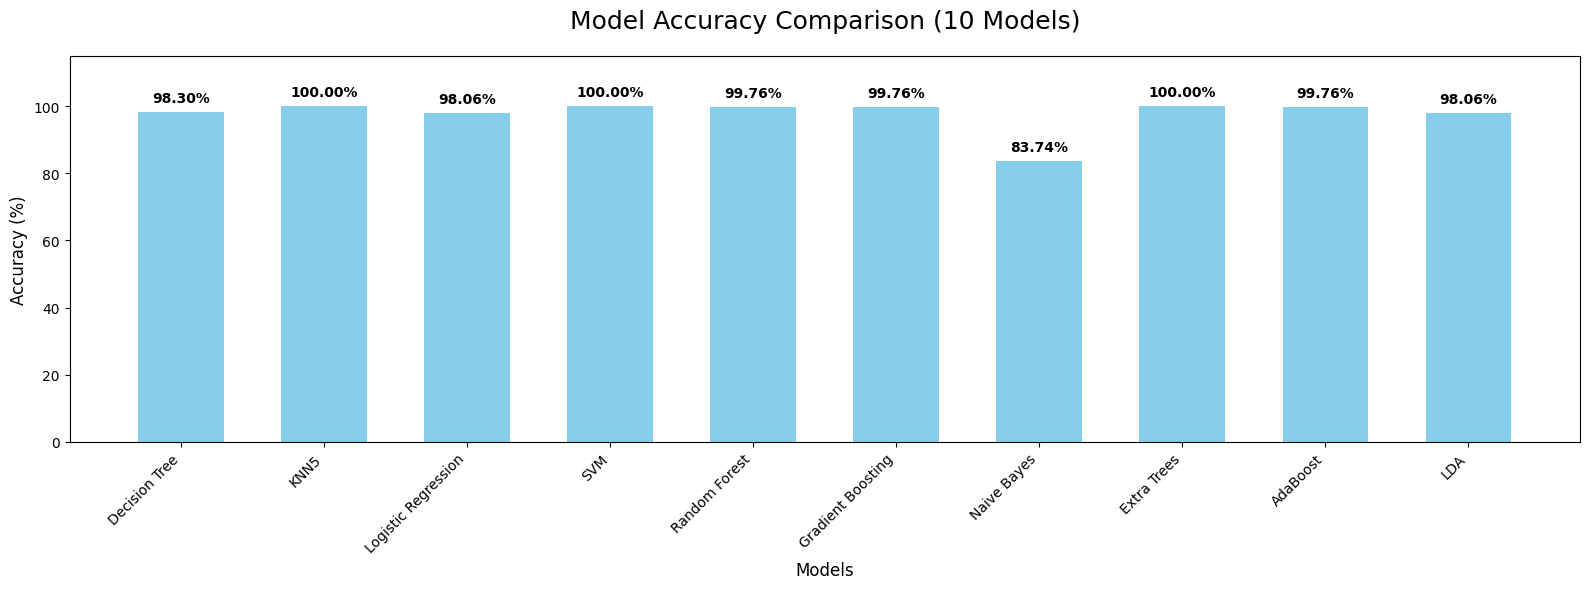

In [20]:
# Step: Visualize Model Accuracy Comparison
# This step visualizes the accuracy (%) of all 10 trained models using a bar chart.

# Store the accuracy values for all trained models
accuracies = {
    'Decision Tree': accuracy_dt,
    'KNN5': accuracy_knn5,
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'Naive Bayes': accuracy_nb,
    'Extra Trees': accuracy_et,
    'AdaBoost': accuracy_ada,
    'LDA': accuracy_lda
}

# Convert values to percentages if they are between 0 and 1
models = list(accuracies.keys())
values = [(acc * 100 if acc <= 1 else acc) for acc in accuracies.values()]

# Create the bar chart figure
plt.figure(figsize=(16, 6))

# Plot the bar chart for model accuracies
bars = plt.bar(models, values, color='skyblue', width=0.6)

# Add chart title and labels
plt.title('Model Accuracy Comparison (10 Models)', fontsize=18, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim([0, max(values) * 1.15])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display accuracy values above each bar
for bar, acc in zip(bars, values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(values)*0.02,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the final visualization
plt.show()




## Visualize Confusion Matrices for All Models

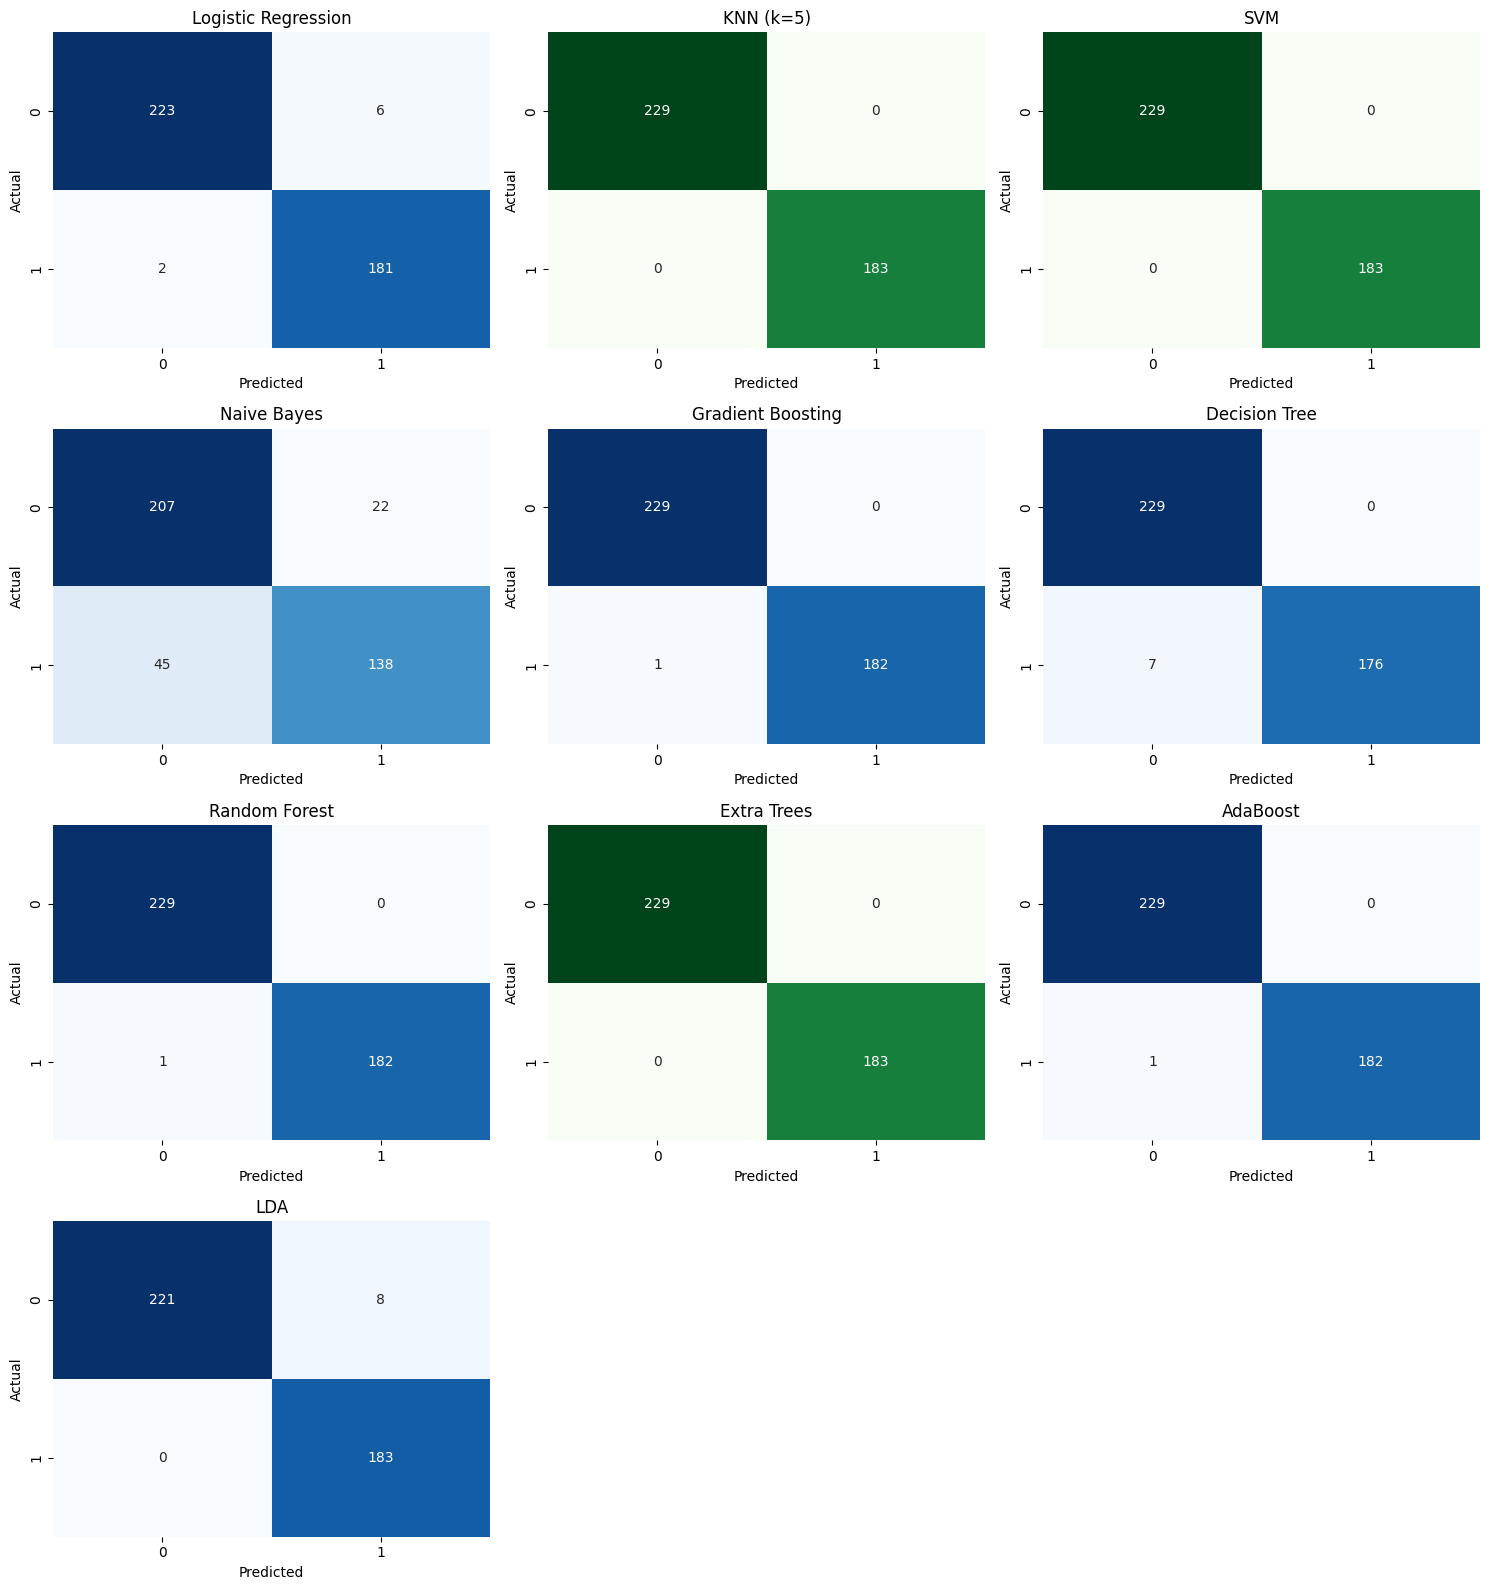

In [21]:
# Dictionary of Confusion Matrices for all trained models
all_conf_matrices = {
    'Logistic Regression': 'conf_matrix_lr',
    'KNN (k=5)': 'conf_matrix_knn5',
    'SVM': 'conf_matrix_svm',
    'Naive Bayes': 'conf_matrix_nb',
    'Gradient Boosting': 'conf_matrix_gb',
    'Decision Tree': 'conf_matrix_dt',
    'Final Decision Tree': 'conf_matrix_dt_final',
    'Random Forest': 'conf_matrix_rf',
    'Extra Trees': 'conf_matrix_et',
    'AdaBoost': 'conf_matrix_ada',
    'LDA': 'conf_matrix_lda'
}

# Verify which Confusion Matrices are available in the current environment
available_models = []
cms = []

for name, var_name in all_conf_matrices.items():
    if var_name in globals():
        available_models.append(name)
        cms.append(globals()[var_name])

# Prepare the subplot grid based on the number of models
n = len(available_models)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten() if n > 1 else [axes]

# Plot each Confusion Matrix
for i, (model, cm) in enumerate(zip(available_models, cms)):
    
    # If the matrix is perfect (no misclassifications)
    if np.array_equal(cm, np.diag(np.diag(cm))):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[i])  # Green = perfect prediction
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])   # Blue = normal performance
    
    # Add titles and labels
    axes[i].set_title(model)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Display all Confusion Matrices
plt.show()


## Compare Performance Metrics for All Models

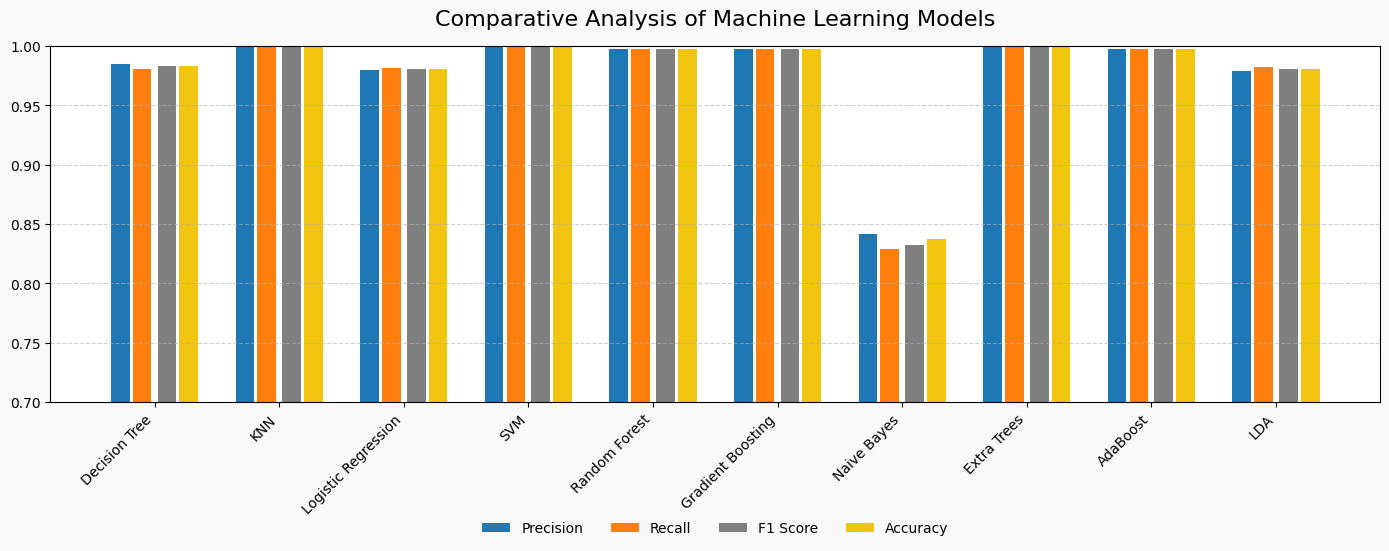

In [22]:
# Compare multiple machine learning models based on key performance metrics

# Store predicted values for all trained models
models = {
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn5,
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Naive Bayes": y_pred_nb,
    "Extra Trees": y_pred_et,
    "AdaBoost": y_pred_ada,
    "LDA": y_pred_lda
}

# Initialize lists to store metrics
model_names, precisions, recalls, f1_scores, accuracies = [], [], [], [], []

# Extract evaluation metrics for each model
for name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    acc = accuracy_score(y_test, y_pred)

    model_names.append(name)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(acc)

# Set positions and spacing for bars
x = np.arange(len(model_names))
width = 0.15
spacing = 0.05

# Create the figure with a soft gray background
plt.figure(figsize=(14, 6), facecolor="#f9f9f9")

# Draw separated bars for each metric
plt.bar(x - (1.5*width + spacing), precisions, width, label='Precision', color='#1F77B4')  # Blue
plt.bar(x - (0.5*width + spacing/2), recalls, width, label='Recall', color='#FF7F0E')      # Orange
plt.bar(x + (0.5*width + spacing/2), f1_scores, width, label='F1 Score', color='#7F7F7F')  # Gray
plt.bar(x + (1.5*width + spacing), accuracies, width, label='Accuracy', color='#F1C40F')   # Yellow

# Customize chart appearance
plt.title('Comparative Analysis of Machine Learning Models', fontsize=16, pad=15)
plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display legend below the chart
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.30),
    ncol=4,
    frameon=False
)

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.32)

# Show the chart
plt.show()


## Model Performance Summary (Styled Comparison Table)

In [23]:
# Compare overall performance (macro average) of all machine learning models

# Store all predicted results for the trained models
models = {
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn5,
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Naive Bayes": y_pred_nb,
    "Extra Trees": y_pred_et,
    "AdaBoost": y_pred_ada,
    "LDA": y_pred_lda
}

# Compute macro-average metrics for each model
summary = []
for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    summary.append({
        "Model": name,
        "Accuracy": acc * 100,
        "Precision": report['macro avg']['precision'] * 100,
        "Recall": report['macro avg']['recall'] * 100,
        "F1-score": report['macro avg']['f1-score'] * 100
    })

# Create a DataFrame containing all metrics
df_summary = pd.DataFrame(summary)

# Define a custom blue gradient color map
from matplotlib.colors import LinearSegmentedColormap
blue_cmap = LinearSegmentedColormap.from_list("blue_grad", ["#dceeff", "#1e40af"])  # light → dark blue

# Style the DataFrame for a clean visual summary
styled_df = (
    df_summary.style
    .format({
        "Accuracy": "{:.2f}%",
        "Precision": "{:.2f}%",
        "Recall": "{:.2f}%",
        "F1-score": "{:.2f}%"
    })
    .background_gradient(subset=["Accuracy"], cmap=blue_cmap, vmin=70, vmax=100)
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#0D6EFD'),
                                     ('color', 'white'),
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                     ('padding', '8px'),
                                     ('border', '1px solid #ddd')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f8f9fa')]}
    ])
    .set_caption("📈 <b>MODEL PERFORMANCE SUMMARY</b>")
)

# Display the styled performance summary table
display(styled_df)


,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,98.30%,98.52%,98.09%,98.27%
1,KNN,100.00%,100.00%,100.00%,100.00%
2,Logistic Regression,98.06%,97.95%,98.14%,98.04%
3,SVM,100.00%,100.00%,100.00%,100.00%
4,Random Forest,99.76%,99.78%,99.73%,99.75%
5,Gradient Boosting,99.76%,99.78%,99.73%,99.75%
6,Naive Bayes,83.74%,84.20%,82.90%,83.27%
7,Extra Trees,100.00%,100.00%,100.00%,100.00%
8,AdaBoost,99.76%,99.78%,99.73%,99.75%
9,LDA,98.06%,97.91%,98.25%,98.04%


## Compare Classification Reports (All Models)

In [24]:
# Display side-by-side classification reports for all models

# Store all predictions for trained models
models = {
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn5,
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Naive Bayes": y_pred_nb,
    "Extra Trees": y_pred_et,
    "AdaBoost": y_pred_ada,
    "LDA": y_pred_lda
}

# Extract model names and total count
model_names = list(models.keys())
num_models = len(model_names)

# Loop through models two at a time
for i in range(0, num_models, 2):
    # Generate report for the first model
    name1 = model_names[i]
    y_pred1 = models[name1]
    report1 = pd.DataFrame(classification_report(y_test, y_pred1, output_dict=True)).T.round(3)
    html1 = f"<h3 style='color:#1f77b4;'>🔹 {name1}</h3>" + report1.to_html(classes='table table-striped', border=0)
    
    # Generate report for the second model (if available)
    if i + 1 < num_models:
        name2 = model_names[i + 1]
        y_pred2 = models[name2]
        report2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict=True)).T.round(3)
        html2 = f"<h3 style='color:#2ca02c;'>🔹 {name2}</h3>" + report2.to_html(classes='table table-striped', border=0)
    else:
        html2 = ""

    # Display both reports side by side
    combined_html = f"""
    <div style='display:flex; justify-content:space-between; gap:30px;'>
        <div style='width:48%; border:1px solid #ddd; border-radius:10px; padding:10px; box-shadow:0 0 5px #ccc;'>{html1}</div>
        <div style='width:48%; border:1px solid #ddd; border-radius:10px; padding:10px; box-shadow:0 0 5px #ccc;'>{html2}</div>
    </div>
    """
    display(HTML(combined_html))


,precision,recall,f1-score,support
0,0.970,1.000,0.985,229.000
1,1.000,0.962,0.981,183.000
accuracy,0.983,0.983,0.983,0.983
macro avg,0.985,0.981,0.983,412.000
weighted avg,0.984,0.983,0.983,412.000
,precision,recall,f1-score,support
0,1.0,1.0,1.0,229.0
1,1.0,1.0,1.0,183.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,412.0


,precision,recall,f1-score,support
0,0.991,0.974,0.982,229.000
1,0.968,0.989,0.978,183.000
accuracy,0.981,0.981,0.981,0.981
macro avg,0.980,0.981,0.980,412.000
weighted avg,0.981,0.981,0.981,412.000
,precision,recall,f1-score,support
0,1.0,1.0,1.0,229.0
1,1.0,1.0,1.0,183.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,412.0


,precision,recall,f1-score,support
0,0.996,1.000,0.998,229.000
1,1.000,0.995,0.997,183.000
accuracy,0.998,0.998,0.998,0.998
macro avg,0.998,0.997,0.998,412.000
weighted avg,0.998,0.998,0.998,412.000
,precision,recall,f1-score,support
0,0.996,1.000,0.998,229.000
1,1.000,0.995,0.997,183.000
accuracy,0.998,0.998,0.998,0.998
macro avg,0.998,0.997,0.998,412.000


,precision,recall,f1-score,support
0,0.821,0.904,0.861,229.000
1,0.862,0.754,0.805,183.000
accuracy,0.837,0.837,0.837,0.837
macro avg,0.842,0.829,0.833,412.000
weighted avg,0.840,0.837,0.836,412.000
,precision,recall,f1-score,support
0,1.0,1.0,1.0,229.0
1,1.0,1.0,1.0,183.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,412.0


,precision,recall,f1-score,support
0,0.996,1.000,0.998,229.000
1,1.000,0.995,0.997,183.000
accuracy,0.998,0.998,0.998,0.998
macro avg,0.998,0.997,0.998,412.000
weighted avg,0.998,0.998,0.998,412.000
,precision,recall,f1-score,support
0,1.000,0.965,0.982,229.000
1,0.958,1.000,0.979,183.000
accuracy,0.981,0.981,0.981,0.981
macro avg,0.979,0.983,0.980,412.000
